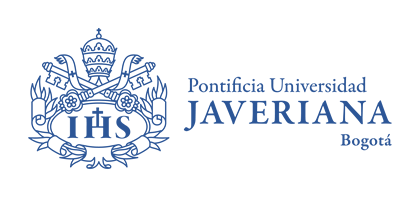

# Análisis de algoritmos - Ejemplo análisis regresión
## Uso de statsmodels para análisis de resultados
Este notebook tiene como objetivo familiarizar al estudiante con el uso del paquete statsmodels de Python para el análisis de resultados experimentales


In [91]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Carga de los archivos

Mediante el uso de la librería pandas, podemos cargar un archivo en formato 'csv' que generamos mediante nuestros experimentos.

In [92]:
df_results = pd.read_csv("resultado2.csv", sep=',', header=0, encoding="utf-8")

In [93]:
df_results.head()

,n,iterativo,dyv
0,100000,0.208366,0.000062
1,200000,0.413799,0.000068
2,300000,0.630273,0.000074
3,400000,0.849510,0.000079
4,500000,1.070831,0.000076


 Con la función plot, podemos revisar el comportamiento del tiempo de ejecución a medida que incrementamos el tamaño de la entrada

<Axes: xlabel='n'>

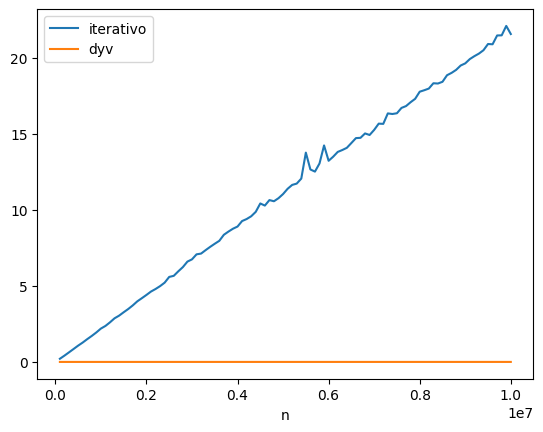

In [94]:
df_results.plot(y=['iterativo','dyv'],x='n')

# statsmodels API

Statsmodels es un paquete de estadística de Python que nos permite realizar de forma sencilla regresiones y confirmar si nuestra hipótesis teórica sobre el comportamiento de un algoritmo coincide con lo que estamos observando experimentalmente.

La función [`ols`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) realiza una regresión de mínimos cuadrados para ver si nuestra variable dependiente (n) se relaciona con la variable independiente (tiempo).

En nuestro DataFrame quedó registrado el tiempo del algoritmo `bubblesort` en la columna `bubble` del algoritmo. Nuestra hipótesis teórica es que este algoritmo es cuadrático, para realizar la confirmación de esta hipótesis vamos a relacionar ambas variables con la siguiente fórmula:

`bubble ~ np.power(n,2)`

Nota: Para ver la sintaxis de cómo se pueden expresar estas fórmulas, puede conocer más en el siguiente link:

https://www.statsmodels.org/devel/example_formulas.html


In [95]:
# ver https://www.statsmodels.org/devel/example_formulas.html

In [96]:
mod = smf.ols(formula='iterativo ~ n', data=df_results)

In [97]:
res = mod.fit()

In [98]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              iterativo   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.308e+04
Date:                Mon, 23 Feb 2026   Prob (F-statistic):          1.77e-139
Time:                        20:22:13   Log-Likelihood:                -3.0373
No. Observations:                 100   AIC:                             10.07
Df Residuals:                      98   BIC:                             15.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0953      0.051      1.877      0.0

Los parámetros nos indican la relación encontrada entre las variables

In [99]:
res.params


Intercept    0.095297
n            0.000002
dtype: float64

El plot_fit nos indica qué tanto ajuste logró la regresión vs los valores reales. Diferencias importantes para n pequeños o n grandes nos indicarían que no se está ajustando de forma correcta a la hipótesis.

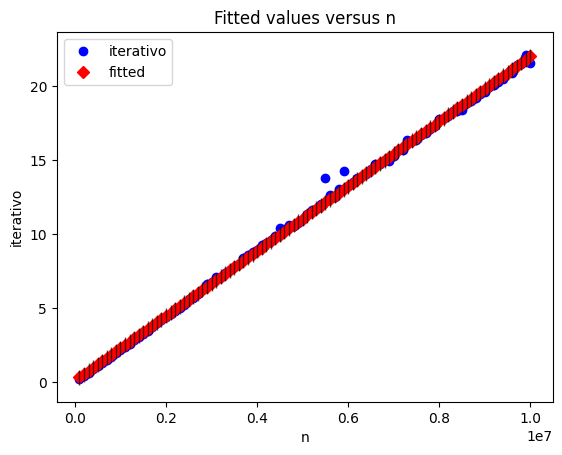

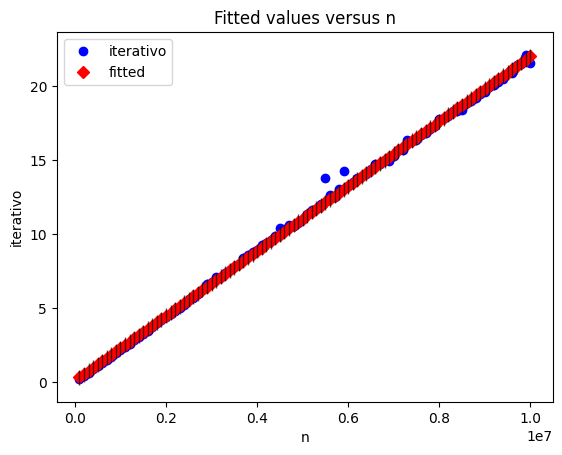

In [100]:
sm.graphics.plot_fit(res,"n")

El siguiente código prueba el resultado de la hipótesis de la complejidad teórica del quicksort vs lo obtenido.

In [101]:
mod = smf.ols(formula='dyv ~ np.log2(n)', data=df_results)

In [102]:
res = mod.fit()

In [103]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    dyv   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           3.13e-21
Time:                        20:22:13   Log-Likelihood:                 827.55
No. Observations:                 100   AIC:                            -1651.
Df Residuals:                      98   BIC:                            -1646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0010      0.000    -10.034      0.0

In [104]:
res.params

Intercept    -0.001027
np.log2(n)    0.000057
dtype: float64

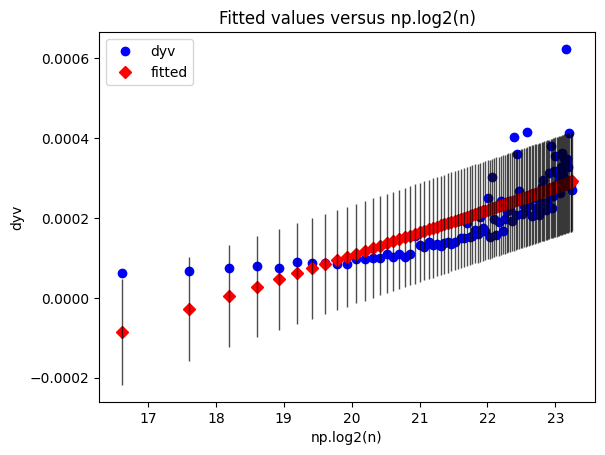

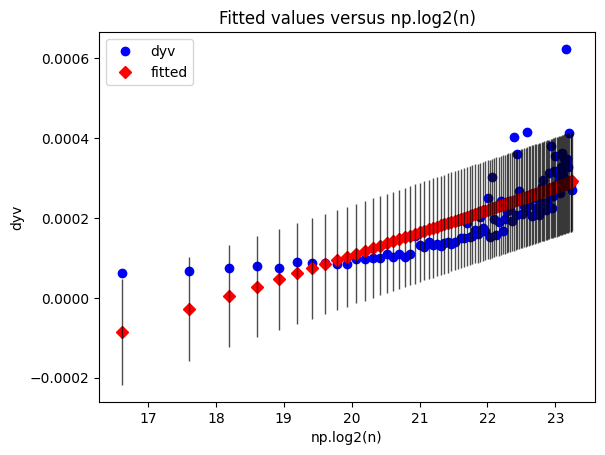

In [105]:
sm.graphics.plot_fit(res, "np.log2(n)")